In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lime
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('compas-scores-raw.csv')
df

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [53]:
df.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [3]:
df.drop(['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','Screening_Date','DateOfBirth'],axis=1,inplace = True)

In [4]:
df.columns

Index(['Agency_Text', 'Sex_Code_Text', 'Ethnic_Code_Text', 'ScaleSet_ID',
       'ScaleSet', 'AssessmentReason', 'Language', 'LegalStatus',
       'CustodyStatus', 'MaritalStatus', 'RecSupervisionLevel',
       'RecSupervisionLevelText', 'Scale_ID', 'DisplayText', 'RawScore',
       'DecileScore', 'ScoreText', 'AssessmentType', 'IsCompleted',
       'IsDeleted'],
      dtype='object')

In [5]:
df['labels']=np.where(df['ScoreText'] == 'Low',0, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agency_Text              60843 non-null  object 
 1   Sex_Code_Text            60843 non-null  object 
 2   Ethnic_Code_Text         60843 non-null  object 
 3   ScaleSet_ID              60843 non-null  int64  
 4   ScaleSet                 60843 non-null  object 
 5   AssessmentReason         60843 non-null  object 
 6   Language                 60843 non-null  object 
 7   LegalStatus              60843 non-null  object 
 8   CustodyStatus            60843 non-null  object 
 9   MaritalStatus            60843 non-null  object 
 10  RecSupervisionLevel      60843 non-null  int64  
 11  RecSupervisionLevelText  60843 non-null  object 
 12  Scale_ID                 60843 non-null  int64  
 13  DisplayText              60843 non-null  object 
 14  RawScore              

In [7]:
df.drop('ScoreText',axis=1,inplace=True)

<AxesSubplot:xlabel='Ethnic_Code_Text', ylabel='DecileScore'>

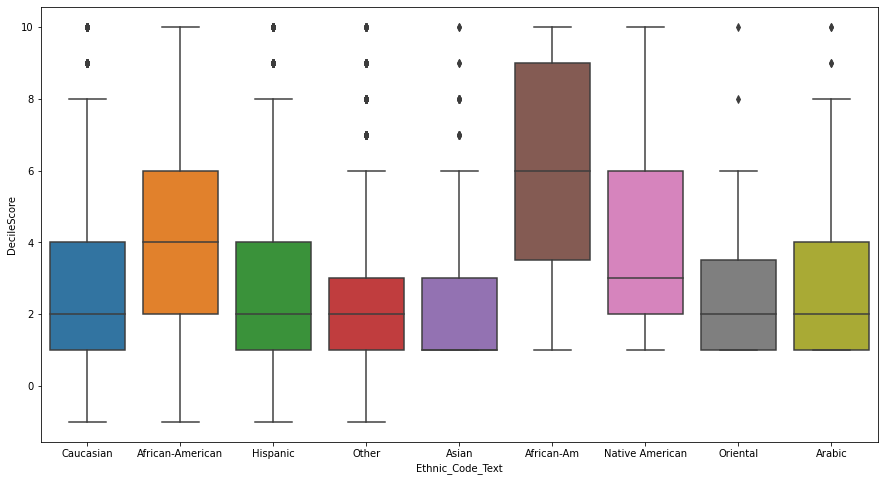

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df['Ethnic_Code_Text'],y = df['DecileScore'])

In [9]:
df.drop('DecileScore',axis=1,inplace=True)

In [10]:
df = pd.get_dummies(df,drop_first=True)

In [11]:
corr = pd.DataFrame(df.corr()['labels'].sort_values(ascending=False))
corr

,labels
labels,1.000000
RecSupervisionLevel,0.579173
RecSupervisionLevelText_Medium with Override Consideration,0.343186
RecSupervisionLevelText_Medium,0.263332
Ethnic_Code_Text_African-American,0.209999
MaritalStatus_Single,0.194462
DisplayText_Risk of Recidivism,0.165438
RawScore,0.092518
Agency_Text_PRETRIAL,0.083728
LegalStatus_Pretrial,0.075977


<AxesSubplot:>

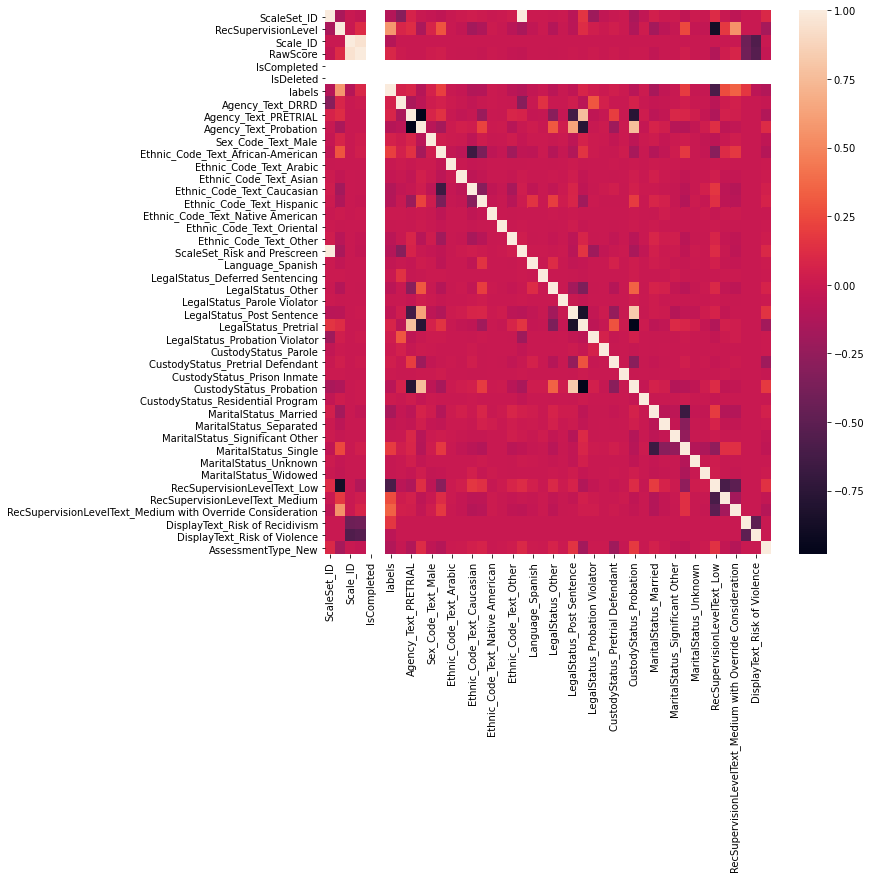

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('labels',axis = 1)
y = df['labels']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
weights = pd.concat([pd.DataFrame(df.columns),pd.DataFrame(model.coef_[0])],axis=1)
weights.columns = ['Column','Weight']
weights.sort_values(by='Weight',ascending=False,inplace=True)

<BarContainer object of 44 artists>

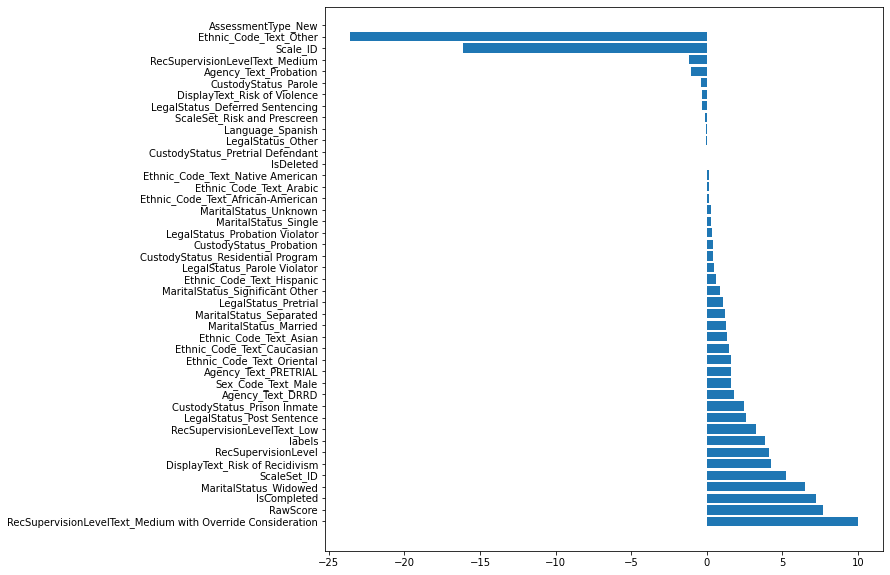

In [37]:
plt.figure(figsize=(10,10))
plt.barh(y=weights['Column'],width=weights['Weight'])

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13648
           1       0.97      0.96      0.96      6431

    accuracy                           0.98     20079
   macro avg       0.98      0.97      0.97     20079
weighted avg       0.98      0.98      0.98     20079



In [41]:
confusion_matrix(y_test,y_pred)

array([[13458,   190],
       [  262,  6169]], dtype=int64)

### LIME

In [42]:
y_test.reset_index(drop=True,inplace=True)

In [43]:
from lime import lime_tabular

In [44]:
explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
                                             feature_names=X_train.columns,
                                             class_names=[0,1])

In [45]:
exp = explainer.explain_instance(data_row=X_test.iloc[1],
                          predict_fn=model.predict_proba)
exp.show_in_notebook()

In [46]:
print("Model Predicted Value:",y_pred[1])
print("Actual Value:",y_test[1])

Model Predicted Value: 0
Actual Value: 0


In [47]:
X_test.iloc[1]

ScaleSet_ID                                                   22.0
RecSupervisionLevel                                            1.0
Scale_ID                                                      18.0
RawScore                                                      16.0
IsCompleted                                                    1.0
IsDeleted                                                      0.0
Agency_Text_DRRD                                               0.0
Agency_Text_PRETRIAL                                           1.0
Agency_Text_Probation                                          0.0
Sex_Code_Text_Male                                             1.0
Ethnic_Code_Text_African-American                              1.0
Ethnic_Code_Text_Arabic                                        0.0
Ethnic_Code_Text_Asian                                         0.0
Ethnic_Code_Text_Caucasian                                     0.0
Ethnic_Code_Text_Hispanic                                     

In [48]:
exp = explainer.explain_instance(data_row=X_test.iloc[2],
                          predict_fn=model.predict_proba)
exp.show_in_notebook()

In [49]:
print("Model Predicted Value:",y_pred[2])
print("Actual Value:",y_test[2])

Model Predicted Value: 1
Actual Value: 1


In [50]:
X_test.iloc[2]

ScaleSet_ID                                                   22.00
RecSupervisionLevel                                            4.00
Scale_ID                                                       8.00
RawScore                                                       0.47
IsCompleted                                                    1.00
IsDeleted                                                      0.00
Agency_Text_DRRD                                               0.00
Agency_Text_PRETRIAL                                           1.00
Agency_Text_Probation                                          0.00
Sex_Code_Text_Male                                             1.00
Ethnic_Code_Text_African-American                              1.00
Ethnic_Code_Text_Arabic                                        0.00
Ethnic_Code_Text_Asian                                         0.00
Ethnic_Code_Text_Caucasian                                     0.00
Ethnic_Code_Text_Hispanic                       

In [51]:
y_test

0        0
1        0
2        1
3        0
4        0
        ..
20074    0
20075    0
20076    1
20077    0
20078    1
Name: labels, Length: 20079, dtype: int32